# (Electronic) Store Purchases: Exploratory Data Analysis (EDA).

# Prerequisites:

#### Importing the Python Libraries:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

%matplotlib inline
sns.set(rc={"figure.figsize":(12, 7)}, style="darkgrid", context="paper", font_scale=1.5)

#### Importing the Data:

In [4]:
# -> Merged (12–Months) of Sales Data (Jan–Dec) into a (Single) CSV File!
files = [file for file in os.listdir("Desktop/Sales_Data")]
all_files = pd.DataFrame()

for filename in files:
    df = pd.read_csv("Desktop/Sales_Data/" + filename)
    all_files = pd.concat([all_files, df])

all_files.to_csv("Desktop/Sales_Data/all_data.csv", index=False)

In [5]:
e_store = pd.read_csv("Desktop/Sales_Data/all_data.csv", usecols=[*range(0, 6)])
e_store.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"


#### Summary of Dataset:

In [6]:
print("Rows     : {}".format(e_store.shape[0]))
print("Columns  : {}".format(e_store.shape[1]))
print("\nFeatures : {}".format(e_store.columns.tolist()))
print("\nMissing values : {}".format(e_store.isnull().values.sum()))
print("\nUnique values : \n{}".format(e_store.nunique()))

Rows     : 373700
Columns  : 6

Features : ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

Missing values : 6540

Unique values : 
Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64


# PART A: (Data Cleaning).

#### TASK 1 – Drop (redundant/unnecessary) Columns/Rows from the DataFrame.

In [7]:
# -> Dropped (355) Rows with (Column) names as their cell values!
redundant_rows = e_store.loc[e_store["Order ID"]=="Order ID", :]
e_store.drop(index=redundant_rows.index ,axis=0, inplace=True)

#### TASK 2 – Deal with Missing Values.

In [8]:
# -> Dropped (545) Rows with (all) NAN values!
e_store[e_store.isna().any(axis=1)]
e_store.dropna(how="all", inplace=True)

#### TASK 3 – Scrub for Duplicate data, if any. Removing duplicates to get a (clean) Dataset.

In [10]:
# -> Dropped (264) duplicate Rows from the DataFrame!
e_store.duplicated().sum()
e_store.drop_duplicates(keep="first", inplace=True)

#### TASK 4 – Validate if Columns are of the (correct) Type.

In [12]:
# -> ["Order_ID","Quantity Ordered","Price Each","Order_Date"] needs to be converted to their correct Types!
e_store.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### TASK 5 – Convert ['Order ID', 'Quantity Ordered', 'Price Each'] into a (numeric) Object.

In [13]:
e_store["Order ID"] = pd.to_numeric(e_store["Order ID"])
e_store["Quantity Ordered"] = pd.to_numeric(e_store["Quantity Ordered"])
e_store["Price Each"] = pd.to_numeric(e_store["Price Each"])

#### TASK 6 – Convert 'Order Date' into a proper (DateTime) Object, then (Split) into different columns: [Hour, Date, Day of week, Month, Year].

In [14]:
e_store["Order Date"] = pd.to_datetime(e_store["Order Date"])

e_store["Hour"] = e_store["Order Date"].apply(lambda x: x.hour)
e_store["Date"] = e_store["Order Date"].apply(lambda x: x.date())
e_store["DayOfWeek"] = e_store["Order Date"].apply(lambda x: x.dayofweek)
e_store["Month"] = e_store["Order Date"].apply(lambda x: x.month)
e_store["Year"] = e_store["Order Date"].apply(lambda x: x.year)

dmap = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
mmap = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

e_store.DayOfWeek = e_store.DayOfWeek.map(dmap)
e_store.Month = e_store.Month.map(mmap)

#### TASK 7 – Segregate 'Order Date' into a Day/Night time basis.

In [15]:
# -> Day if (before) 18:00 and Night (after) 18:00!
e_store["Day/Night"] = e_store["Order Date"].apply(lambda x: "Night" if int(x.strftime("%H")) >= 18 else "Day")

#### TASK 8 – Augment Data with (Additional) Columns.

In [16]:
e_store["Sales"] = e_store["Price Each"] * e_store["Quantity Ordered"]
e_store["City"] = e_store["Purchase Address"].apply(lambda x: x.split(",")[1] +" ("+ x.split(",")[2].split(" ")[1] +")")

#### Extras – Time span of the Dataset.

In [17]:
from dateutil import relativedelta

min_date = e_store["Order Date"].min()
max_date = e_store["Order Date"].max()
diff = relativedelta.relativedelta(pd.to_datetime(max_date), pd.to_datetime(min_date))

print("Start Date: {}".format(min_date))
print("End Date: {}".format(max_date))
print("Dataset Timespan: {} years and {} months".format(diff.years, diff.months))

Start Date: 2019-01-01 03:07:00
End Date: 2020-01-01 05:13:00
Dataset Timespan: 1 years and 0 months


# PART B: (Data Exploration & Visualization).

#### QUESTION 1 – Top 10 (Products) for Sales?

In [18]:
top_10_products = e_store.groupby("Product")["Sales"].sum()
print(round(top_10_products.sort_values(ascending=False), 2).head(10))

Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Name: Sales, dtype: float64


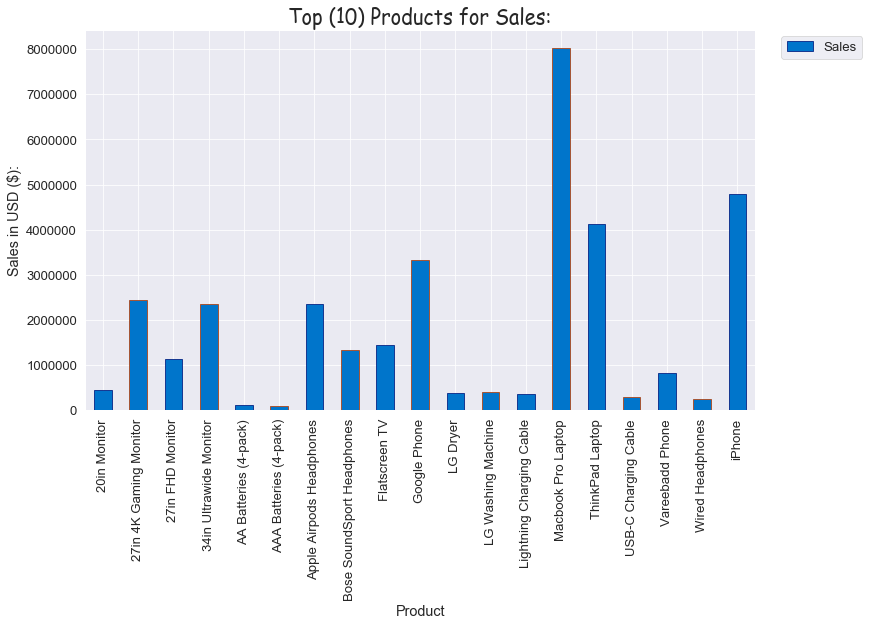

In [20]:
plt.title("Top (10) Products for Sales:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
top_10_products.plot(kind="bar", color="#0075CB", edgecolor=sns.color_palette("dark", 2), label="Sales");
plt.ylabel("Sales in USD ($):");
plt.legend(bbox_to_anchor=(1.17, 1));

In [21]:
# -> (Best) Product for Sales is 'Macbook Pro Laptop' followed by 'IPhone' then 'ThinkPad Laptop'.
# -> (Worst) Product for Sales is 'AAA Batteries (4-pack)' followed by 'AA Batteries (4-pack)' then 'Wired Headphones'.

#### QUESTION 2 – Top 10 (Cities) for Sales?

In [22]:
top_10_cities = e_store.groupby("City")["Sales"].sum()
print(round(top_10_cities.sort_values(ascending=False), 2).head(10))

City
 San Francisco (CA)    8254743.55
 Los Angeles (CA)      5448304.28
 New York City (NY)    4661867.14
 Boston (MA)           3658627.65
 Atlanta (GA)          2794199.07
 Dallas (TX)           2765373.96
 Seattle (WA)          2745046.02
 Portland (OR)         1870010.56
 Austin (TX)           1818044.33
 Portland (ME)          449321.38
Name: Sales, dtype: float64


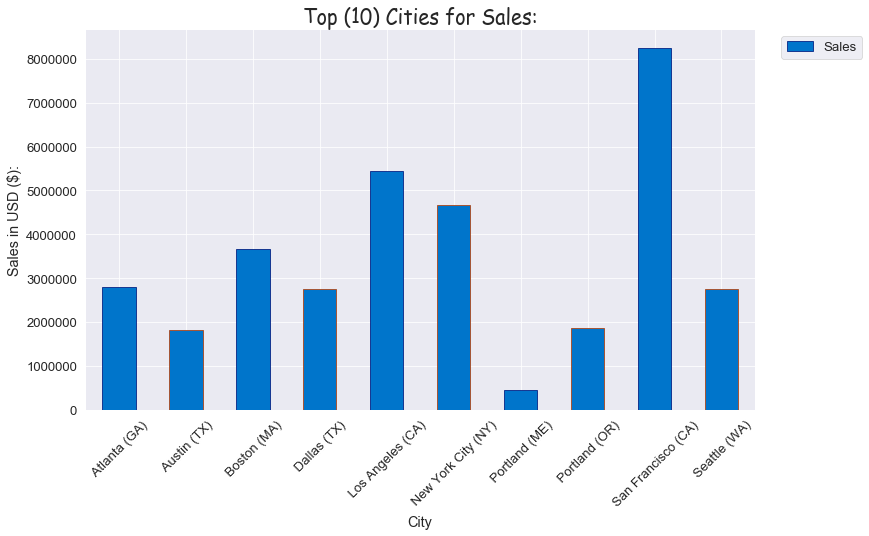

In [23]:
plt.title("Top (10) Cities for Sales:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
top_10_cities.plot(kind="bar", color="#0075CB", edgecolor=sns.color_palette("dark", 2), label="Sales");
plt.ylabel("Sales in USD ($):");
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.17, 1));

In [24]:
# -> (Best) City for Sales is 'San Francisco (CA)' followed 'Los Angeles (CA)' then 'New York City (NY)'.
# -> (Worst) City for Sales is 'Portland (ME)' followed by 'Austin (TX)' then 'Portland (OR)'.

#### QUESTION 3 – Top 10 (Dates) for Sales, across all (Years)?

In [25]:
top_10_dates = e_store.Date.value_counts()
print(top_10_dates.head(10))

2019-12-17    879
2019-12-23    868
2019-12-13    857
2019-12-29    840
2019-12-16    825
2019-12-19    823
2019-12-15    822
2019-12-12    819
2019-12-06    817
2019-12-28    816
Name: Date, dtype: int64


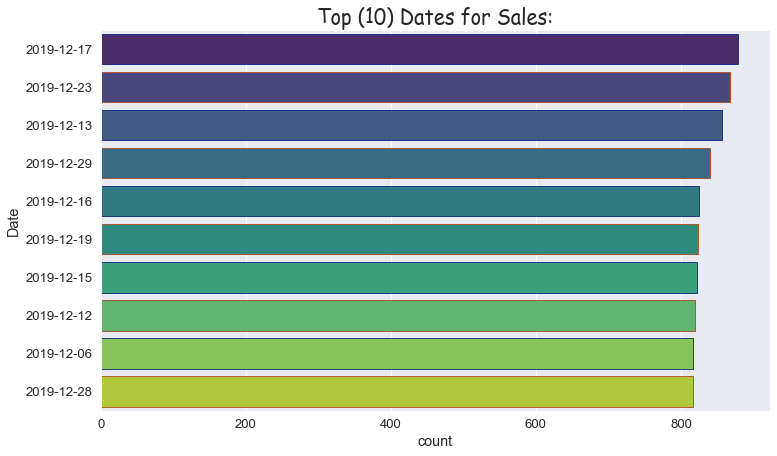

In [26]:
plt.title("Top (10) Dates for Sales:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.countplot(y=e_store.Date, order=top_10_dates.index[:10], edgecolor=sns.color_palette("dark", 2), palette="viridis", data=e_store);

In [27]:
# -> A large part of the retailer's (annual) Sales and profits occurs in the (three) months before Christmas.
# -> Christmas Day (bargain-hunters) also spend (three) times as much as (last minute) Christmas Eve shoppers.

#### QUESTION 4 – (Best/Worst) Month for Sales?

In [28]:
monthly_sales = e_store.groupby("Month")["Sales"].sum()
best_month = monthly_sales.max()
worst_month = monthly_sales.min()

print("(Best) Months Revenue: ${}".format(round(best_month, 2)))
print("(Worst) Months Revenue: ${}".format(round(worst_month, 2)))

(Best) Months Revenue: $4608295.7
(Worst) Months Revenue: $1821413.16


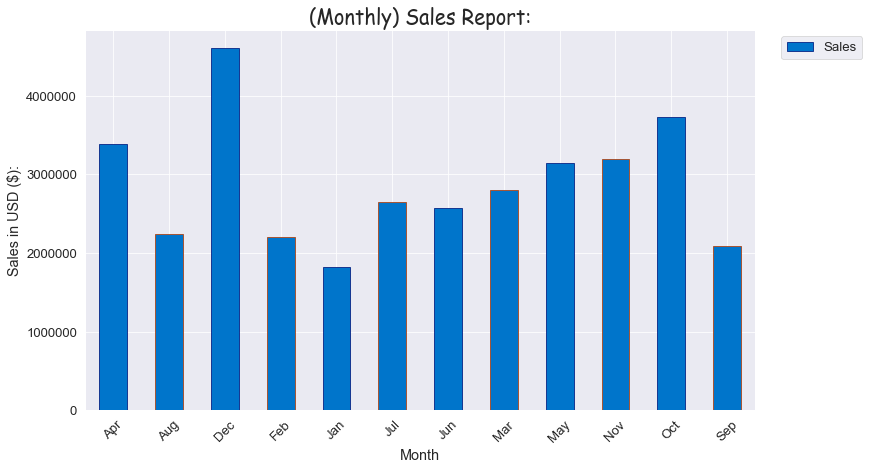

In [30]:
plt.title("(Monthly) Sales Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
monthly_sales.plot(kind="bar", color="#0075CB", edgecolor=sns.color_palette("dark", 2), label="Sales");
plt.ylabel("Sales in USD ($):");
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(1.17, 1));

#### QUESTION 5 – (Sales) during the Day/Night?

In [31]:
day_night = e_store["Day/Night"].value_counts()
print(day_night)

Day      122344
Night     63342
Name: Day/Night, dtype: int64


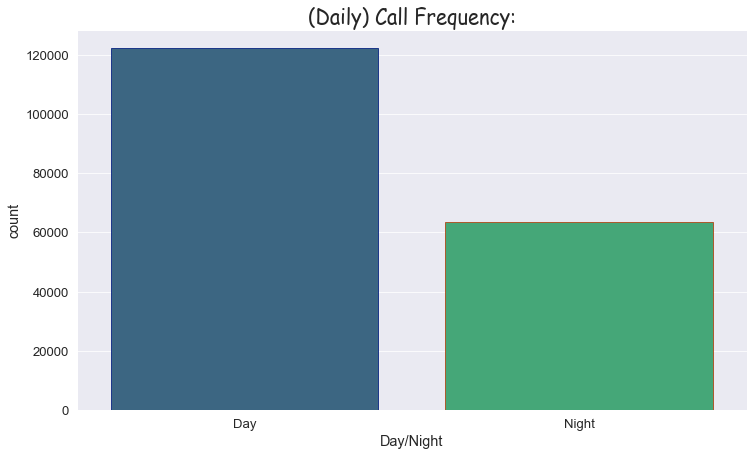

In [32]:
plt.title("(Daily) Call Frequency:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.countplot(e_store["Day/Night"], edgecolor=sns.color_palette("dark", 2), palette="viridis", data=e_store);

In [33]:
# -> (Most) Sales took place during the (Day) rather than at (Night).

#### QUESTION 6 – (Time) to Display Advertisements to (Maximise) likelihood of Customers buying Products?

In [34]:
best_hour = e_store.groupby("Hour")["Sales"].count() # -> Count for (Orders).
print("(Best) Hour Orders: {}".format(best_hour.max()))

(Best) Hour Orders: 12886


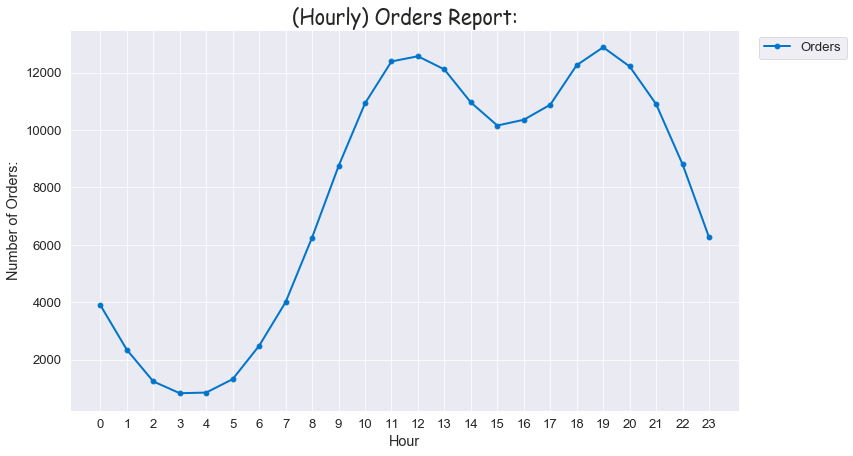

In [35]:
plt.title("(Hourly) Orders Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
hours = [hour for hour, df in e_store.groupby("Hour")]
best_hour.plot(color="#0075CB", marker="o", linewidth=2, label="Orders");
plt.ylabel("Number of Orders:");
plt.xticks(hours);
plt.legend(bbox_to_anchor=(1.17, 1));

In [36]:
# -> Suggestion: Display Advertisements (slightly) before 11AM or 7PM (19:00).

#### QUESTION 7 – (Products) which are often sold (Together)?

In [37]:
# Referenced: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = e_store.groupby("Order ID").filter(lambda x: len(x) > 1)

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head(4)

,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"


In [38]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in df["Grouped"]:
    row_list = sublist.split(",")
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1002),
 (('Google Phone', ' USB-C Charging Cable'), 985),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 413),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 119),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

#### QUESTION 8 – Price-to-Sales (Ratio)? Does this have any significance?

In [40]:
prices = e_store.groupby("Product")["Price Each"].mean()
sales = e_store.groupby("Product")["Quantity Ordered"].sum()

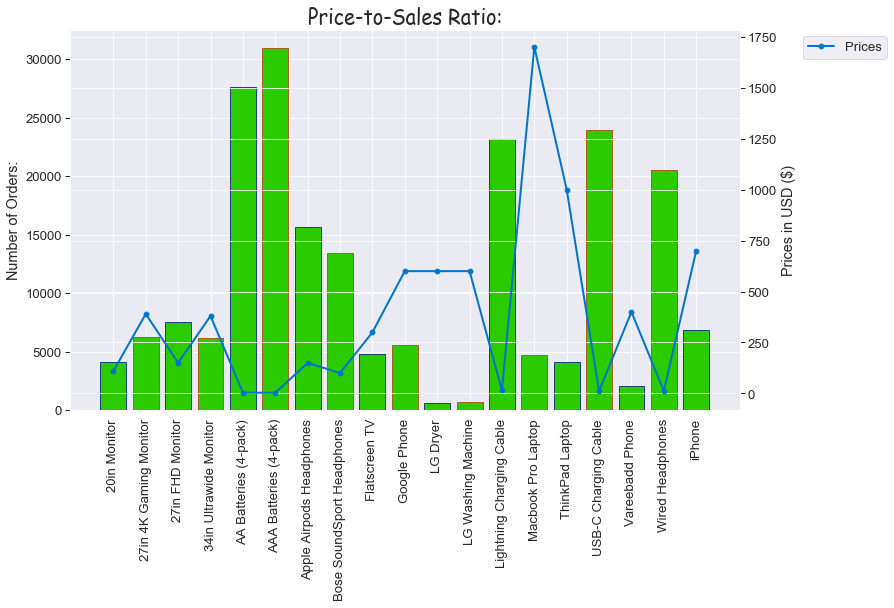

In [41]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

products = [pair for pair, df in e_store.groupby('Product')]
ax1.bar(products, sales, color="#2BCB00", edgecolor=sns.color_palette("dark", 2))
ax2.plot(products, prices, color="#0075CB", marker="o", linewidth=2, label="Prices")

ax1.set_title("Price-to-Sales Ratio:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
ax1.set_xticklabels(products, rotation="vertical");
ax1.set_ylabel("Number of Orders:");
ax2.set_ylabel("Prices in USD ($)");
plt.legend(bbox_to_anchor=(1.23, 1));

#### QUESTION 9 – Plot a Correlation Matrix? Correlation between Variables?

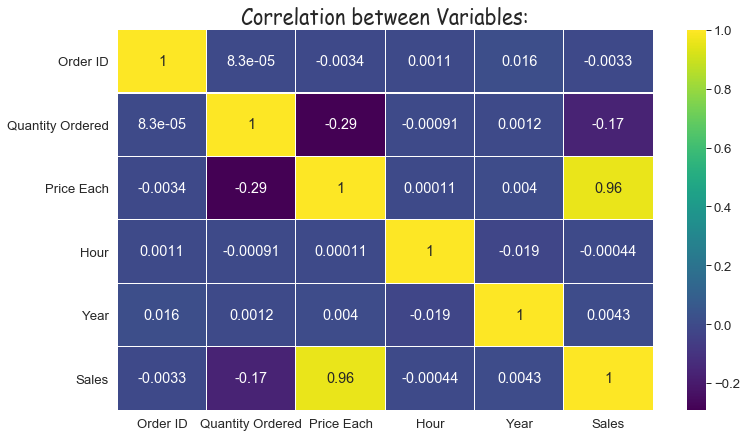

In [42]:
plt.title("Correlation between Variables:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})
sns.heatmap(e_store.corr(method="kendall"), annot=True, cmap="viridis", linewidths=0.1);

In [43]:
# -> No Strong correlation between (any) of the Variables.

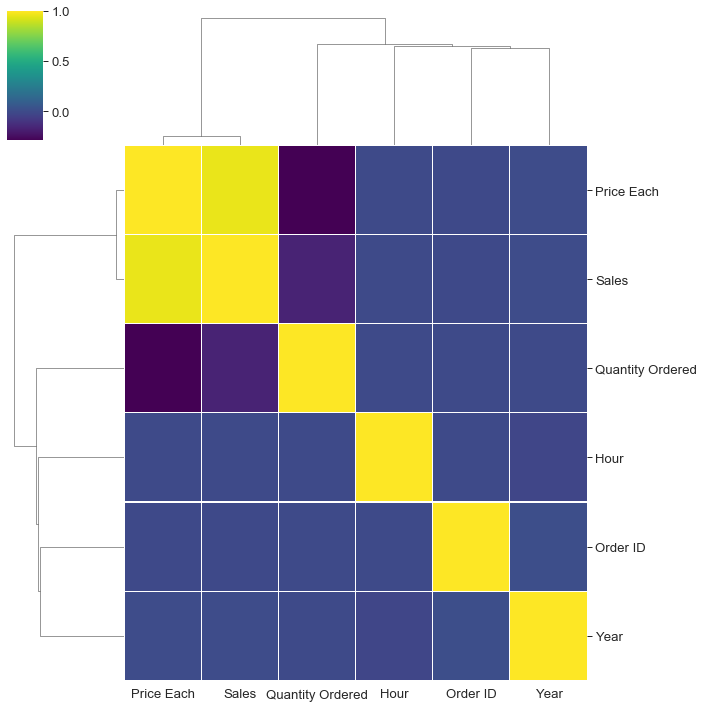

In [44]:
sns.clustermap(e_store.corr(method="kendall"), cmap="viridis", linewidths=0.1);

### And this concludes the exploratory analysis project.